In [139]:
import io
import re
import csv
import bs4
import time
import string
import tqdm
import multiprocessing
import nltk
import spacy
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from textblob import TextBlob
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from urllib import request
from wordcloud import WordCloud,STOPWORDS
from tqdm.notebook import trange, tqdm

In [311]:
import scipy.stats as stats

In [216]:
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (581980377.py, line 1)

In [18]:
import missingno as msno

In [23]:
# 1: Preprocessing Data
folder = 'https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/'
cleaned_hm = pd.read_csv(folder+'cleaned_hm.csv', sep = ",",on_bad_lines='skip')
demographic = pd.read_csv(folder+'demographic.csv', sep = ",",on_bad_lines='skip')
senselable = pd.read_csv(folder+'senselabel.csv', sep = ',',on_bad_lines='skip')
topic = pd.read_csv(folder+'topic_dict', sep = ',',on_bad_lines='skip')

In [30]:
senselable.head()

,hmid,tokenOffset,word,lowercaseLemma,POS,MWE,offsetParent,supersenseLabel
0,31526,1,I,i,PRON,O,0,NaN
1,31526,2,found,find,VERB,O,0,v.cognition
2,31526,3,a,a,DET,O,0,NaN
3,31526,4,silver,silver,ADJ,O,0,NaN
4,31526,5,coin,coin,NOUN,O,0,n.artifact


In [6]:
cleaned_hm.head(10)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection
5,27678,45,24h,I meditated last night.,I meditated last night.,True,1,leisure,leisure
6,27679,195,24h,"I made a new recipe for peasant bread, and it ...","I made a new recipe for peasant bread, and it ...",True,1,NaN,achievement
7,27680,740,24h,I got gift from my elder brother which was rea...,I got gift from my elder brother which was rea...,True,1,NaN,affection
8,27681,3,24h,YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED,YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED,True,1,NaN,enjoy_the_moment
9,27682,4833,24h,Watching cupcake wars with my three teen children,Watching cupcake wars with my three teen children,True,1,NaN,affection


<AxesSubplot:>

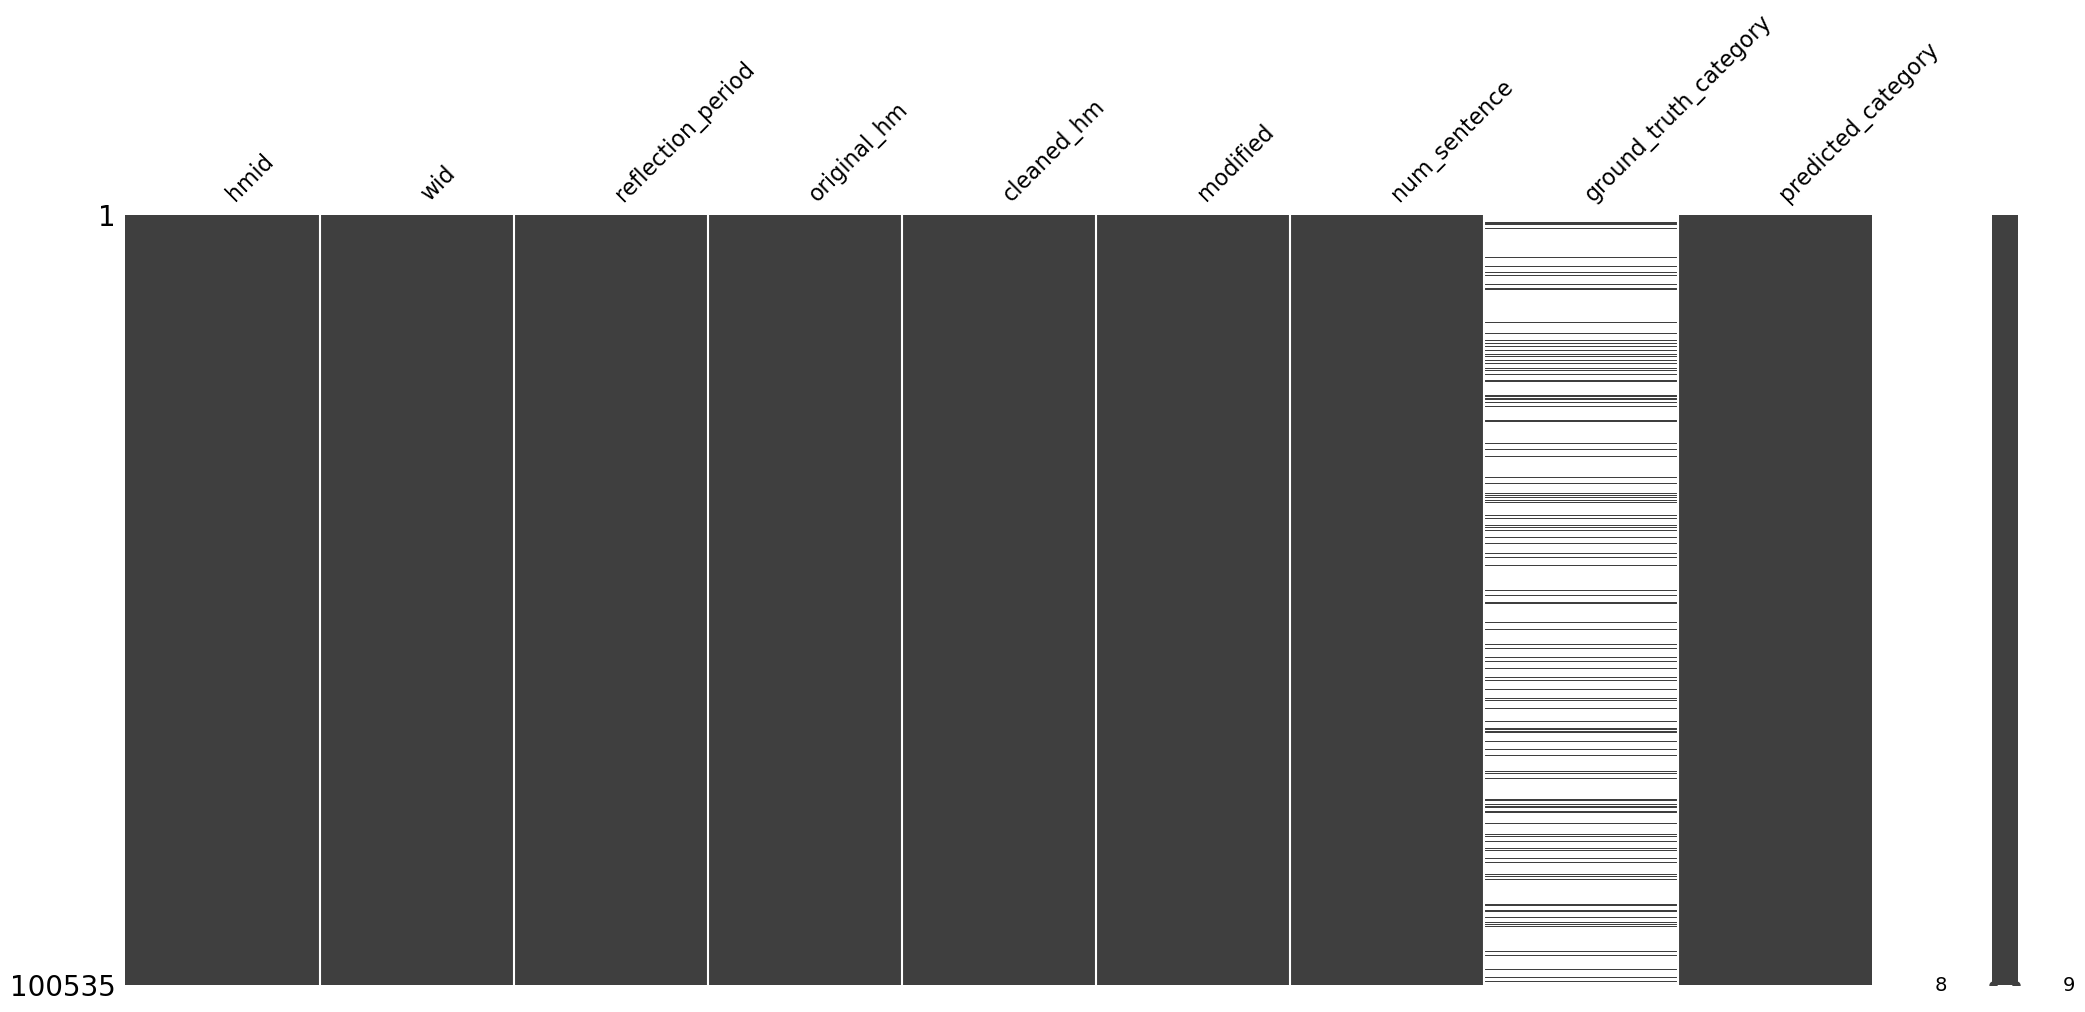

In [19]:
## 1.1: Missing Value

msno.matrix(cleaned_hm)

In [22]:
# from the missing plot, we can see that only ground_truth_category has many missing_values(color white)
cleaned_hm.drop('ground_truth_category', axis=1)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,affection
...,...,...,...,...,...,...,...,...
100530,128762,112,24h,My husband announced he is getting a decent bo...,My husband announced he is getting a decent bo...,True,1,affection
100531,128763,714,24h,Had a can of Pepsi to drink.,Had a can of Pepsi to drink.,True,1,enjoy_the_moment
100532,128764,3934,24h,Cuddling with my girlfriend last night.,Cuddling with my girlfriend last night.,True,1,affection
100533,128765,1629,24h,I had a great meeting yesterday at work with m...,I had a great meeting yesterday at work with m...,True,1,bonding


In [ ]:
## 1.2: Tokenize
## 1.3: Lemmatization
# Because HappyDB provides senselabel.csv, which has already tokenized the sentences and lemmatized the words,
# I can simply connect the senselabel to cleaned_hm as a replacement of tokenization and lemmatization

In [ ]:
## 1.4: StopWord Removing
## to reduce the redundant information, we did stopword removing to our texts

In [71]:
# download the stopwords in English
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
noStopWords = senselable.copy()
# drop_condition = noStopWords['word'] in stop_words
noStopIndex = noStopWords.apply(lambda x: x['word'] not in stop_words, axis = 1)
noStopWords = senselable[noStopIndex]

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
## 1.5: punctuation removing

In [273]:
veryCleanData = noStopWords[~noStopWords['lowercaseLemma'].str.contains(r'[!@#$%^&*()_+{}\[\]:;"<>,.?/~\\]').astype(bool)]

In [279]:
reserve = len(veryCleanData)/len(senselable)
print('After Preprocess, we reserved {:.2f}% of the original texts'.format(reserve*100))

After Preprocess, we reserved 53.81% of the original texts


In [ ]:
# 2: Explortory Data Analysis

In [124]:
noStopWords = senselable[noStopIndex]

  0%|          | 0/100535 [00:00<?, ?it/s]

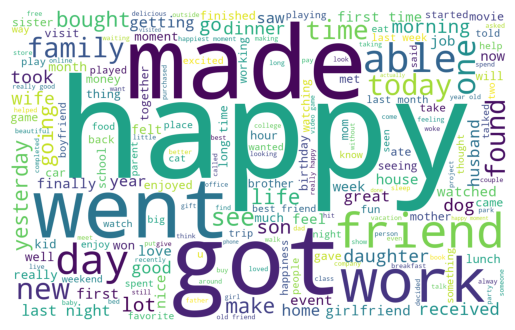

<AxesSubplot:xlabel='num_sentence', ylabel='Count'>

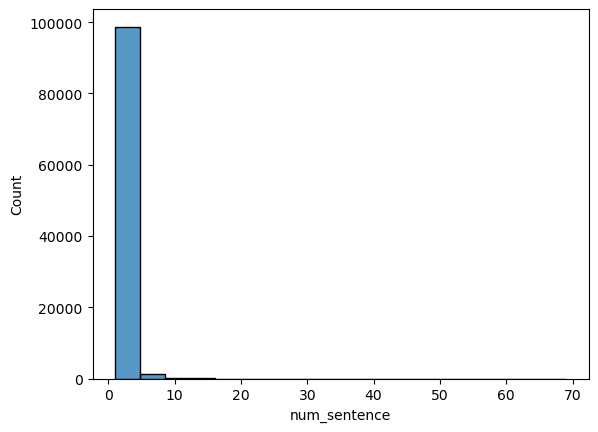

In [140]:
# 2.1: word Clouds
def nuage_de_mots(text): 
    
    wordcloud = WordCloud(background_color="white",
                          relative_scaling = 1.0,
                          width=1280, 
                          height=800, 
                          stopwords = STOPWORDS # mots à ne pas prendre en compte dans le nuage
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()  
    
def preprocessing_text(df):
    # On enlève les crochets et virgules et on les remplace par des tirets pour bien distinguer les mots-clés
    df.cleaned_hm = df.cleaned_hm.str.replace(r'[^\w\s]', '-')
    
    # Les seuls espaces possibles se trouvent au sein d'un même mot-clé ou bien entre deux mots-clés distincts
    df.cleaned_hm= df.cleaned_hm.str.replace(' ', '_')
    
    # On supprime les '-_-' qui ont été créés suite aux deux étapes précédentes
    df.cleaned_hm =  df.cleaned_hm.str.replace('-_-', '')

    # Désormais, les tirets sont la seule marque de ponctuation inutile
    df.cleaned_hm =  df.cleaned_hm.str.replace('-', ' ')
    return df 


def make_word_cloud(df):
    mots_cles = ''
    for i in trange(len(df)):
        mots_cles = mots_cles+str(df.cleaned_hm[i])

    nuage_de_mots(mots_cles)
    
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)
    

def make_word_cloud_list(l):
    mots_cles = ''
    for i in trange(len(l)):
        mots_cles = mots_cles+str(l[i])

    nuage_de_mots(mots_cles)

make_word_cloud(cleaned_hm)

cleaned_hm

sns.histplot(cleaned_hm['num_sentence'])

In [131]:
# 2.2: number of words for each happy moment
# we can see this as the excitement of a person, assuming that when people feels very happy, they tend to be more active
# and may write down more things
happyWords = senselable.groupby('hmid').count()
veryCleanDataWords = veryCleanData.groupby('hmid').count()

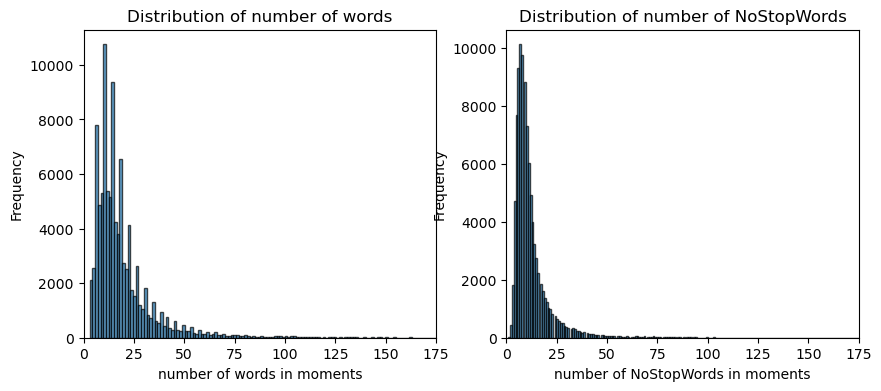

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(happyWords['word'], bins=1000, edgecolor='k', alpha=0.7) 
ax2.hist(veryCleanDataWords['word'], bins=1000, edgecolor='k', alpha=0.7) 
x_range = (0,175)
ax1.set_xlim(x_range)
ax1.set_xlabel('number of words in moments') 
ax1.set_ylabel('Frequency')  
ax1.set_title('Distribution of number of words')  
ax2.set_xlim(x_range)
ax2.set_xlabel('number of NoStopWords in moments')  
ax2.set_ylabel('Frequency')  
ax2.set_title('Distribution of number of NoStopWords')  

plt.show()

In [187]:
print('we can see from the plot, after no stop process, the distribution becomes smoother, \n the distribution of the noStopWords skews to the right')

we can see from the plot, after no stop process, the distribution becomes smoother, 
 the distribution of the noStopWords skews to the right


In [ ]:
# 3: Question: how people express their happiness in various degrees

In [ ]:
# Modelling

Sentiment analysis, Clustering techniques, Topic modelling (LDA, word2vec)...

In [ ]:
# Thoughts: using Sentiment Analysis to find the distribution of happiness

In [ ]:
nltk.download('punkt')  # download punctuation
# new sentiment column in the dataFrame
cleaned_hm['Sentiment'] = cleaned_hm['cleaned_hm'].apply(lambda x: TextBlob(x).sentiment.polarity)

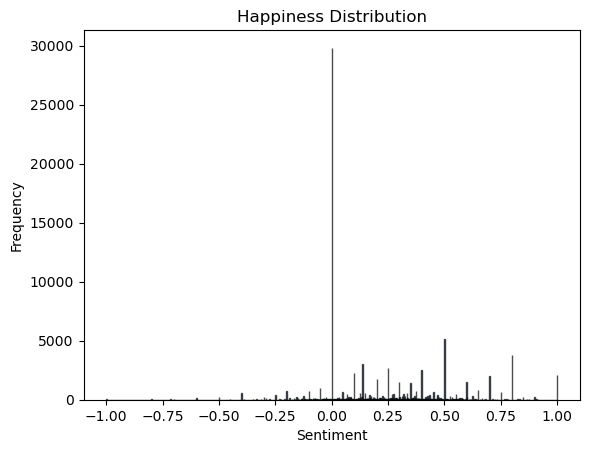

In [203]:
plt.hist(cleaned_hm['Sentiment'], bins=1000, edgecolor='k', alpha=0.7) 
cur_fig = plt.gcf()
xRange = (-0.25,1)
# 
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Happiness Distribution')
plt.show()

In [189]:
print('we can hardly get any information from the sentiment scores, \n0 score is too much, and the left distribution looks messy,\nstill want to save this analysis method, so I cut part of it to give a close look to scores distribution apart from 0')

we can hardly get any information from the sentiment scores, 
0 score is too much, and the left distribution looks messy,
still want to save this analysis method, so I cut part of it to give a close look to scores distribution apart from 0


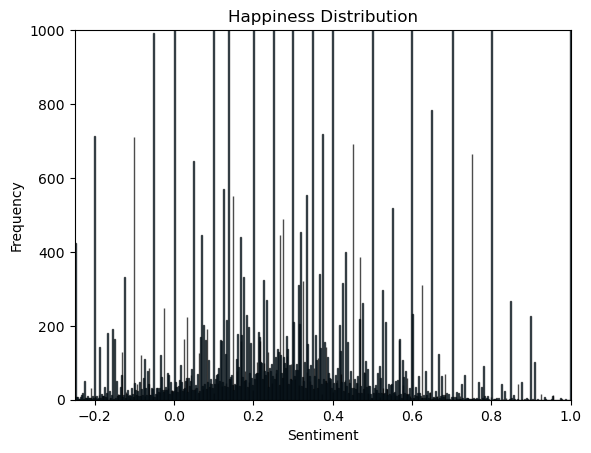

In [208]:
plt.hist(cleaned_hm['Sentiment'], bins=1000, edgecolor='k', alpha=0.7) 
cur_fig = plt.gcf()
xRange = (-0.25,1)
yRange = (0,1000)
plt.xlim(xRange)
plt.ylim(yRange)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Happiness Distribution')
plt.show()

In [210]:
print('still hard to find anything,\nhas to change the method,\nconsidering word2Vector, because it can give more comprehensive score to each text')

still hard to find anything,
has to change the method,
considering word2Vector, because it can give more comprehensive score to each text


In [295]:
merged_data = cleaned_hm.merge(demographic, on='wid', how='inner')

In [298]:
demographic

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y
...,...,...,...,...,...,...
10839,13835,25.0,USA,m,single,n
10840,13836,31,USA,m,single,y
10841,13837,22.0,USA,f,single,n
10842,13838,38,USA,f,married,y


In [301]:
demographic

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y
...,...,...,...,...,...,...
10839,13835,25.0,USA,m,single,n
10840,13836,31,USA,m,single,y
10841,13837,22.0,USA,f,single,n
10842,13838,38,USA,f,married,y


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'single'),
  Text(1, 0, 'married'),
  Text(2, 0, 'divorced'),
  Text(3, 0, 'widowed'),
  Text(4, 0, 'separated')])

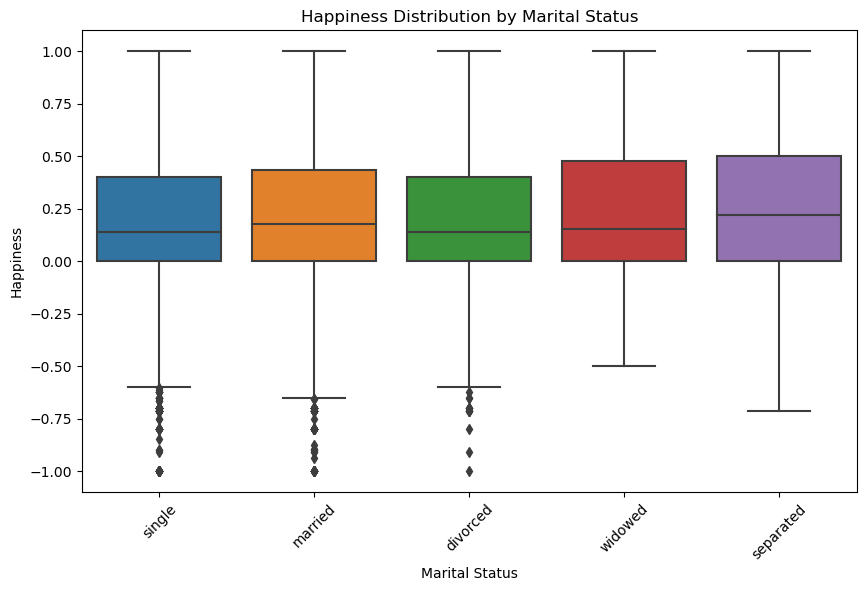

In [302]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='marital', y='Sentiment')
plt.title('Happiness Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Happiness')
plt.xticks(rotation=45)

In [329]:
male = merged_data['gender']=='m'
married = merged_data['marital']=='married'
single = merged_data['marital']=='single'
marriedMale = merged_data[male*married]['Sentiment']
marriedFemale = merged_data[(~male)*married]['Sentiment']
unmarMale = merged_data[male*single]['Sentiment']
unmarFemale = merged_data[(~male)*single]['Sentiment']

In [332]:
f_statistic, p_value = stats.f_oneway(marriedMale, unmarMale, marriedFemale, unmarFemale)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 76.33554789640155
p-value: 2.5979630065976265e-49


In [ ]:
# F_statistic very large and p_value < 0.05, gender and marital has significant influence on happiness

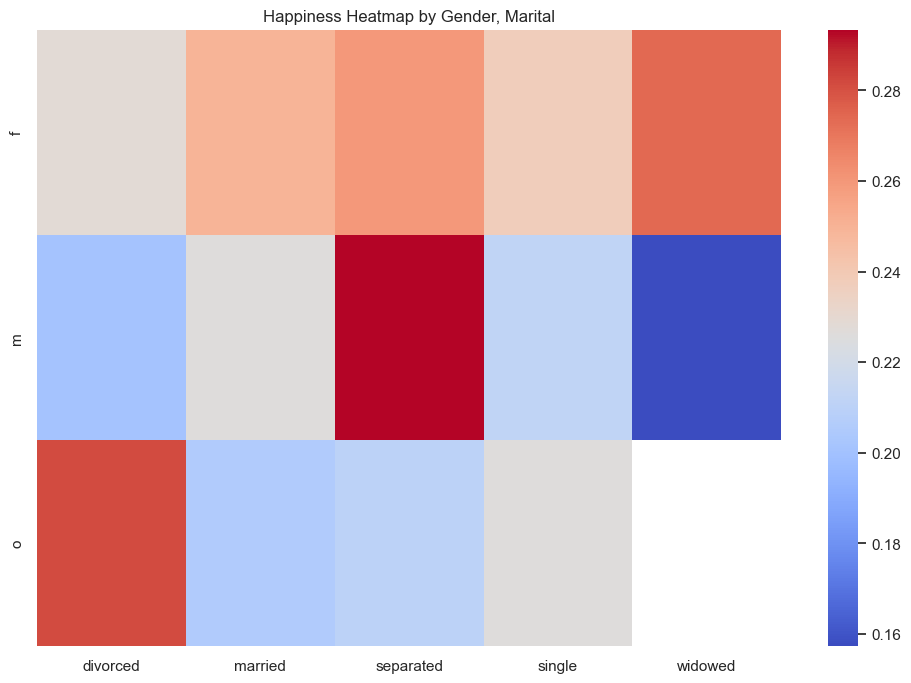

In [388]:
pivot_table = merged_data.pivot_table(index='gender', columns='marital', values='Sentiment', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Happiness Heatmap by Gender, Marital')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [296]:
demographic.head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


In [281]:
# produce the words DB for further use, transform the format into[[split_sentence1],[split_sentence2]...]
grouped = veryCleanData.groupby('hmid')['lowercaseLemma'].agg(list).reset_index()
trainData = grouped['lowercaseLemma'].tolist()

In [285]:
# construct word2Vec model
model = gensim.models.Word2Vec(trainData, vector_size=100, window=5, min_count=1, sg=0)

# train the model
model.train(trainData, total_examples=len(trainData), epochs=10)

(8738235, 10855870)

In [432]:
model.wv.most_similar(positive=["coffee"])

[('starbucks', 0.7520339488983154),
 ('tea', 0.7043381333351135),
 ('latte', 0.6667322516441345),
 ('donuts', 0.6450122594833374),
 ('iced', 0.6439534425735474),
 ('macchiato', 0.6389928460121155),
 ('donut', 0.6320483684539795),
 ('mocha', 0.6277078986167908),
 ('breakfast', 0.6131963729858398),
 ('stanley', 0.5963051915168762)]

In [433]:
model.wv.most_similar(positive=["tea"])

[('cup', 0.7276349663734436),
 ('latte', 0.7086911797523499),
 ('ginger', 0.7079461216926575),
 ('coffee', 0.7043381929397583),
 ('iced', 0.6743446588516235),
 ('brew', 0.6537578105926514),
 ('macchiato', 0.6474440097808838),
 ('milk', 0.6433413624763489),
 ('mocha', 0.6382361054420471),
 ('stanley', 0.6147122979164124)]

In [ ]:
# one interesting thing I found during the process, I found that the sentiment score for 'drink a coke' is 0
# so I want to check how many people report 'coke' related comments
# and further, I want to see the happy that food and drinks can bring to people
# my methods is to see the percentage of happiness gotten from food

24

In [420]:
water = sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'water'))
alcohol = sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'alcohol'))+sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'beer'))+sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'wine'))
tea = sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'tea'))
coffee = sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'starbucks'))+sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'coffee'))+sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'cappuccino'))
juice_smoothie = sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'juice'))+sum(veryCleanData['lowercaseLemma'].apply(lambda x: x == 'smoothie'))

In [429]:
coffee

960

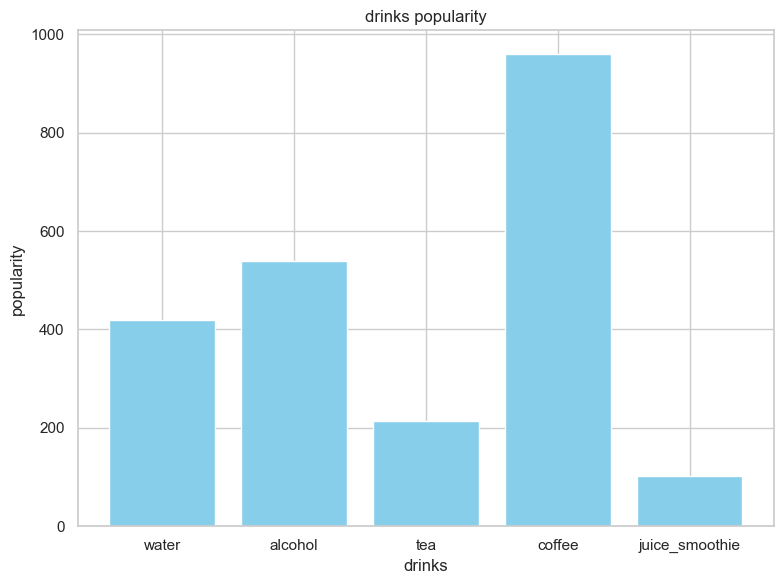

In [427]:
drinks = ['water','alcohol','tea','coffee','juice_smoothie']

# 喜好程度评分（假设分数在1到10之间，10表示最喜欢）
scores = [water,alcohol,tea,coffee,juice_smoothie]

# 创建柱状图
plt.figure(figsize=(8, 6))  # 设置图表尺寸
plt.bar(drinks, scores, color='skyblue')  # 绘制柱状图

# 添加标题和标签
plt.title('drinks popularity')
plt.xlabel('drinks')
plt.ylabel('popularity')

# 显示图表
plt.tight_layout()  # 调整布局，确保标签不重叠
plt.show()